# Regression

This project requires Python 3.7 or above:

In [19]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [20]:
import sklearn

assert sklearn.__version__ >= "1.0.1"

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [22]:
from pathlib import Path

IMAGES_PATH = Path() / "03_regression_images" / "regression"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Linear Regression

##  Develop regression model with normal equation

### Select and prepare data

In [23]:
# Import pandas
import pandas as pd
 
# Read data set
data = pd.read_csv("https://raw.githubusercontent.com/VAWi-DataScience/Data-Science-and-Machine-Learning/main/Lecture/Data/03_Regression_data1.csv",sep=',')

# See the top records in the data
data.head()

,X,y
0,0.749080,6.334288
1,1.901429,9.405278
2,1.463988,8.483724
3,1.197317,5.604382
4,0.312037,4.716440


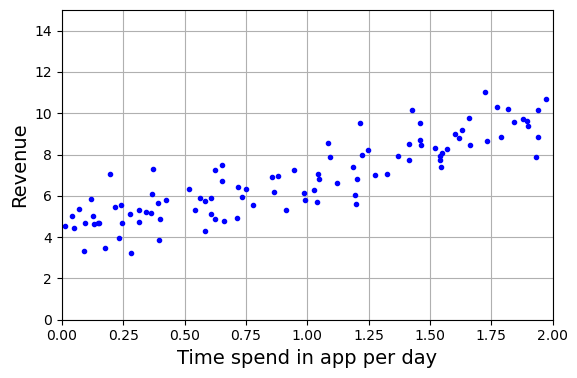

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(data.X, data.y, "b.")
plt.xlabel("Time spend in app per day")
plt.ylabel("Revenue")
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("mobile_app_data_example_1")
plt.show()

Splitting dataset in two parts: feature set (X) and target label (y)

In [25]:
X = data.X.array.reshape(-1, 1)

In [26]:
y = data.y.array.reshape(-1, 1)

### Split dataset

In [27]:
# Import train_test_split function  
from sklearn.model_selection import train_test_split
 
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Train ML model

In [28]:
# Import linear regression model
from sklearn.linear_model import LinearRegression
 
# Create linear regression model
lin_reg = LinearRegression()
 
# Fit the linear regression model
lin_reg.fit(X_train, y_train)

LinearRegression()

### Evaluate traning data

In [29]:
predictions_train = lin_reg.predict(X_train)
# Import the required libraries
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
 
# Evaluate mean absolute error
print('Mean Absolute Error(MAE):', mean_absolute_error(y_train,predictions_train))  
 
# Evaluate mean squared error
print("Mean Squared Error(MSE):", mean_squared_error(y_train, predictions_train))  
 
# Evaluate root mean squared error
print("Root Mean Squared Error(RMSE):", np.sqrt(mean_squared_error(y_train, predictions_train)))
 
# Evaluate R2-square
print("R2-Square:",r2_score(y_train, predictions_train))

Mean Absolute Error(MAE): 0.7347297926919522
Mean Squared Error(MSE): 0.8476788564209705
Root Mean Squared Error(RMSE): 0.9206947683249702
R2-Square: 0.7582381034538057


#### Intercent and coeficients

In [30]:
lin_reg.intercept_, lin_reg.coef_

(array([4.14291332]), array([[2.79932366]]))

#### Visualize regression line

In [31]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

<PandasArray>
[
[4.215096157546749],
[9.755322930423711]
]
Shape: (2, 1), dtype: float64

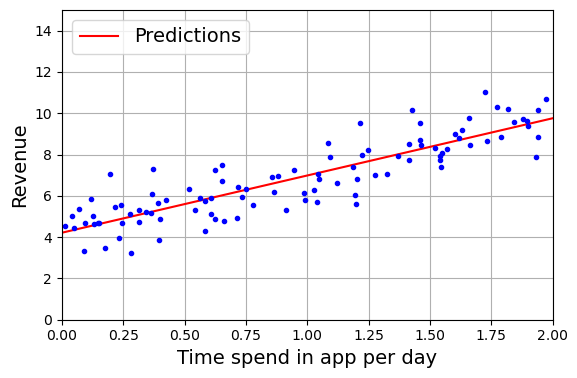

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("Time spend in app per day")
plt.ylabel("Revenue")
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
save_fig("mobile_app_data_example_1_predictions")

plt.show()

### Evaluate test data

In [20]:
# Predict the values given test set
predictions_test = lin_reg.predict(X_test)
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
 
# Evaluate mean absolute error
print('Mean Absolute Error(MAE):', mean_absolute_error(y_test,predictions_test))  
 
# Evaluate mean squared error
print("Mean Squared Error(MSE):", mean_squared_error(y_test, predictions_test))  
 
# Evaluate root mean squared error
print("Root Mean Squared Error(RMSE):", np.sqrt(mean_squared_error(y_test, predictions_test)))
 
# Evaluate R2-square
print("R2-Square:",r2_score(y_test, predictions_test))

Mean Absolute Error(MAE): 0.5913425779189778
Mean Squared Error(MSE): 0.6536995137170021
Root Mean Squared Error(RMSE): 0.8085168605026132
R2-Square: 0.8072059636181391


# Gradient Descent

## Stochastic Gradient Descent

In [39]:
theta_path_sgd = []  # extra code – we need to store the path of theta in the
                     #              parameter space to plot the next figure

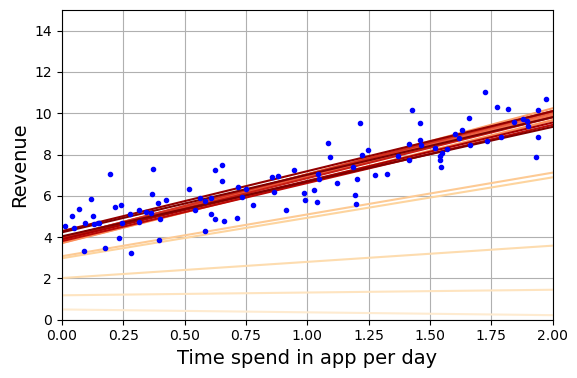

In [40]:
import matplotlib as mpl
m = len(X_b)
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

n_shown = 20  # extra code – just needed to generate the figure below
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting

for epoch in range(n_epochs):
    for iteration in range(m):

        # extra code – these 4 lines are used to generate the figure
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.10))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)  # extra code – to generate the figure

# extra code – this section beautifies and saves Figure 4–10
plt.plot(X, y, "b.")
plt.xlabel("Time spend in app per day")
plt.ylabel("Revenue")
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("mobile_app_data_example_1_SGD")
plt.show()

### Select and prepare data

In [41]:
# Import pandas
import pandas as pd
 
# Read data set
data = pd.read_csv("https://raw.githubusercontent.com/VAWi-DataScience/Data-Science-and-Machine-Learning/main/Lecture/Data/03_Regression_data1.csv",sep=',')

# See the top records in the data
data.head()

,X,y
0,0.749080,6.334288
1,1.901429,9.405278
2,1.463988,8.483724
3,1.197317,5.604382
4,0.312037,4.716440


In [42]:
X = data.X.array.reshape(-1, 1)

In [43]:
y = data.y.array.reshape(-1, 1)

### Split dataset

In [44]:
# Import train_test_split function from 
from sklearn.model_selection import train_test_split
 
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Train ML model

In [45]:
# Import linear regression model
from sklearn.linear_model import SGDRegressor
 
# Create linear regression model
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
 
# Fit the linear regression model
sgd_reg.fit(X_train, y_train.ravel()) # y.ravel() because fit() expects 1D targets

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

### Evaluate traning data

In [46]:
predictions_train_sgd_reg = sgd_reg.predict(X_train)
# Import the required libraries
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
 
# Evaluate mean absolute error
print('Mean Absolute Error(MAE):', mean_absolute_error(y_train,predictions_train_sgd_reg))  
 
# Evaluate mean squared error
print("Mean Squared Error(MSE):", mean_squared_error(y_train, predictions_train_sgd_reg))  
 
# Evaluate root mean squared error
print("Root Mean Squared Error(RMSE):", np.sqrt(mean_squared_error(y_train, predictions_train_sgd_reg)))
 
# Evaluate R2-square
print("R2-Square:",r2_score(y_train, predictions_train_sgd_reg))

Mean Absolute Error(MAE): 0.7348245459810183
Mean Squared Error(MSE): 0.8476797356384964
Root Mean Squared Error(RMSE): 0.9206952457998773
R2-Square: 0.758237852696936


In [47]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.14119539]), array([2.80043269]))

### Evaluate test data

In [48]:
# Predict the values given test set
predictions_test_sgd_reg = sgd_reg.predict(X_test)
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
 
# Evaluate mean absolute error
print('Mean Absolute Error(MAE):', mean_absolute_error(y_test,predictions_test_sgd_reg))  
 
# Evaluate mean squared error
print("Mean Squared Error(MSE):", mean_squared_error(y_test, predictions_test_sgd_reg))  
 
# Evaluate root mean squared error
print("Root Mean Squared Error(RMSE):", np.sqrt(mean_squared_error(y_test, predictions_test_sgd_reg)))
 
# Evaluate R2-square
print("R2-Square:",r2_score(y_test, predictions_test_sgd_reg))

Mean Absolute Error(MAE): 0.5916924455104067
Mean Squared Error(MSE): 0.6541158038528608
Root Mean Squared Error(RMSE): 0.8087742601324927
R2-Square: 0.8070831881625757


# Polynomial Regression

## Polynominal regression

### Select and prepare data

In [7]:
# Import pandas
import pandas as pd
 
# Read data set
df = pd.read_csv("https://raw.githubusercontent.com/VAWi-DataScience/Data-Science-and-Machine-Learning/main/Lecture/Data/03_Regression_data2.csv",sep=',')
df.head()

,Time,Revenue
0,2.247241,1.617611
1,5.704286,8.061859
2,4.391964,4.452506
3,3.591951,0.779585
4,0.936112,1.846257


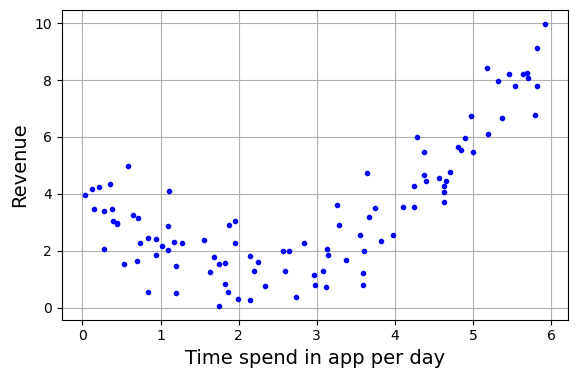

In [8]:
plt.figure(figsize=(6, 4))
plt.plot(df.Time, df.Revenue, "b.")
plt.xlabel("Time spend in app per day")
plt.ylabel("Revenue")
plt.grid()
save_fig("mobile_app_data_example_2")
plt.show()

In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(df.Time.array.reshape(-1, 1)) # adding the square

In [10]:
X_poly[0:4] # show top 4 rows

array([[ 2.24724071,  5.05009082],
       [ 5.70428584, 32.53887693],
       [ 4.39196365, 19.28934471],
       [ 3.59195091, 12.90211131]])

### Split dataset

In [11]:
# Import train_test_split function from 
from sklearn.model_selection import train_test_split
 
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, df.Revenue,test_size=0.2,random_state=42)

### Train ML model

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train, y_train)

LinearRegression()

### Evaluate training data

In [13]:
lin_reg_poly.intercept_, lin_reg_poly.coef_

(4.0130667878862205, array([-2.4607229 ,  0.56726223]))

In [14]:
predictions_train_lin_reg_poly = lin_reg_poly.predict(X_train)
# Import the required libraries
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
 
# Evaluate mean absolute error
print('Mean Absolute Error(MAE):', mean_absolute_error(y_train,predictions_train_lin_reg_poly))  
 
# Evaluate mean squared error
print("Mean Squared Error(MSE):", mean_squared_error(y_train, predictions_train_lin_reg_poly))  
 
# Evaluate root mean squared error
print("Root Mean Squared Error(RMSE):", np.sqrt(mean_squared_error(y_train, predictions_train_lin_reg_poly)))
 
# Evaluate R2-square
print("R2-Square:",r2_score(y_train, predictions_train_lin_reg_poly))

Mean Absolute Error(MAE): 0.7034466665093438
Mean Squared Error(MSE): 0.8147153703416314
Root Mean Squared Error(RMSE): 0.9026158487095335
R2-Square: 0.8497157422674118


### Visualize regression model

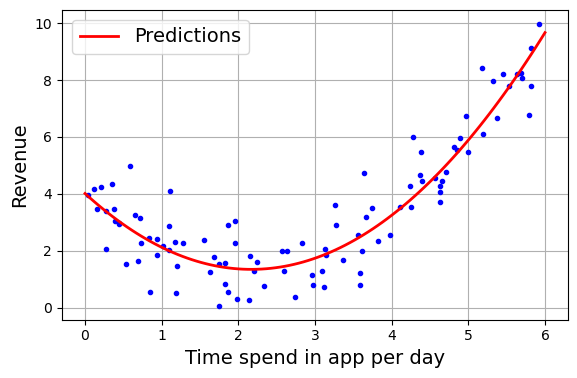

In [15]:
X_new = np.linspace(0, 6, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg_poly.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(df.Time, df.Revenue, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("Time spend in app per day")
plt.ylabel("Revenue")
plt.legend(loc="upper left")
plt.grid()
save_fig("mobile_app_data_example_2_predictions")
plt.show()

### Evaluate test data

In [62]:
# Predict the values given test set
predictions_test_lin_reg_poly = lin_reg_poly.predict(X_test)
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
 
# Evaluate mean absolute error
print('Mean Absolute Error(MAE):', mean_absolute_error(y_test,predictions_test_lin_reg_poly))  
 
# Evaluate mean squared error
print("Mean Squared Error(MSE):", mean_squared_error(y_test, predictions_test_lin_reg_poly))  
 
# Evaluate root mean squared error
print("Root Mean Squared Error(RMSE):", np.sqrt(mean_squared_error(y_test, predictions_test_lin_reg_poly)))
 
# Evaluate R2-square
print("R2-Square:",r2_score(y_test, predictions_test_lin_reg_poly))

Mean Absolute Error(MAE): 0.5779981779496932
Mean Squared Error(MSE): 0.6358406072820797
Root Mean Squared Error(RMSE): 0.7973961420035086
R2-Square: 0.8569223735172776


## Polynominal Regression: Comparison

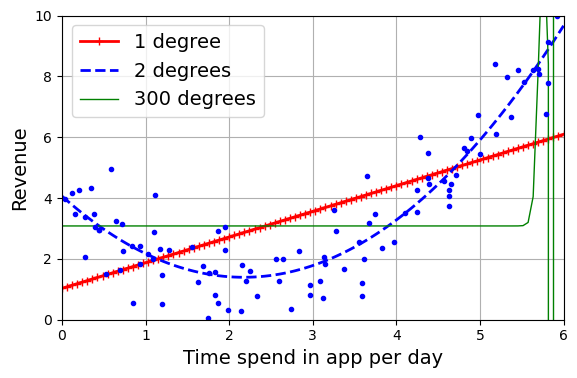

In [63]:
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, lin_reg)
    polynomial_regression.fit(df.Time.array.reshape(-1, 1), df.Revenue)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(df.Time.array.reshape(-1, 1), df.Revenue, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("Time spend in app per day")
plt.ylabel("Revenue")
plt.axis([0, 6, 0, 10])
plt.grid()
save_fig("mobile_app_data_example_2_comparision")
plt.show()

# Learning Curves

(0.0, 80.0, 0.0, 2.5)

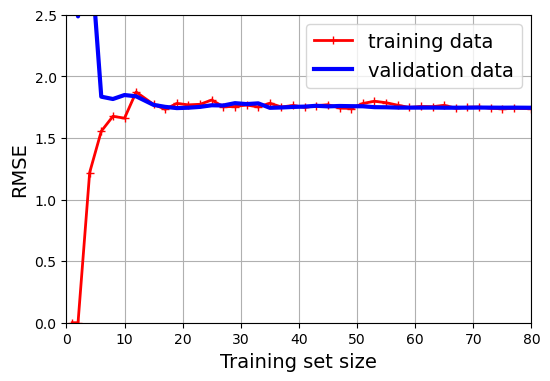

In [64]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), df.Time.array.reshape(-1, 1), df.Revenue, train_sizes=np.linspace(0.01, 1.0, 40), 
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

# plotting the figure
plt.figure(figsize=(6, 4))  
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="training data")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="validation data")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])


In [65]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression,df.Time.array.reshape(-1, 1), df.Revenue, train_sizes=np.linspace(0.01, 1.0, 40),
    scoring="neg_root_mean_squared_error")

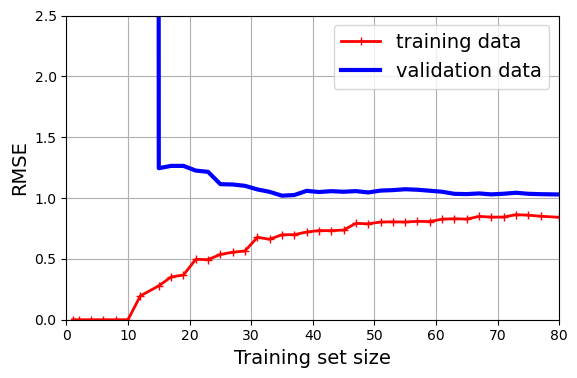

In [66]:
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="training data")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="validation data")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
save_fig("mobile_app_data_example_2_learning_curve")
plt.show()

# Regularized Linear Models

## Ridge Regression

In [67]:
# Import pandas
import pandas as pd
 
# Read data set
data3 = pd.read_csv("https://raw.githubusercontent.com/VAWi-DataScience/Data-Science-and-Machine-Learning/main/Lecture/Data/03_Regression_data3.csv",sep=',')
data3.head()

,Time,Revenue
0,1.123620,0.886589
1,2.852143,2.635570
2,2.195982,1.492642
3,1.795975,0.956452
4,0.468056,2.211127


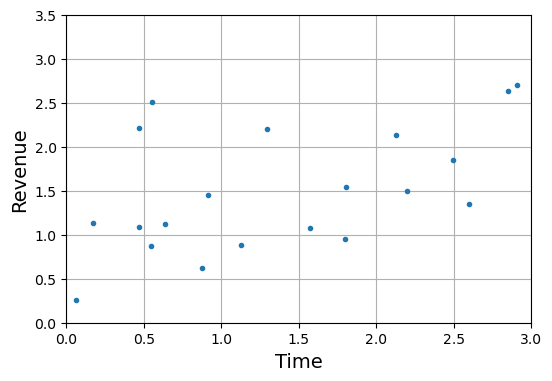

In [68]:
plt.figure(figsize=(6, 4))
plt.plot(data3.Time, data3.Revenue, ".")
plt.xlabel("Time")
plt.ylabel("Revenue")
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

In [69]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(data3.Time.array.reshape(-1, 1), data3.Revenue)

Ridge(alpha=0.1, solver='cholesky')

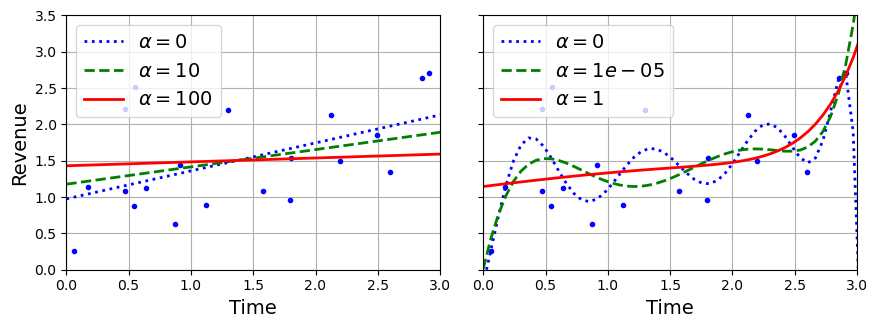

In [70]:
from sklearn.preprocessing import StandardScaler

def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(data3.Time, data3.Revenue, "b.", linewidth=3)
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)
        model.fit(data3.Time.array.reshape(-1, 1), data3.Revenue)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("Time")
    plt.axis([0, 3, 0, 3.5])
    plt.grid()

plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("Revenue")
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
save_fig("mobile_app_data_example_3_comparision_ridge")
plt.show()

## Lasso Regression

In [71]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(data3.Time.array.reshape(-1, 1), data3.Revenue)


Lasso(alpha=0.1)

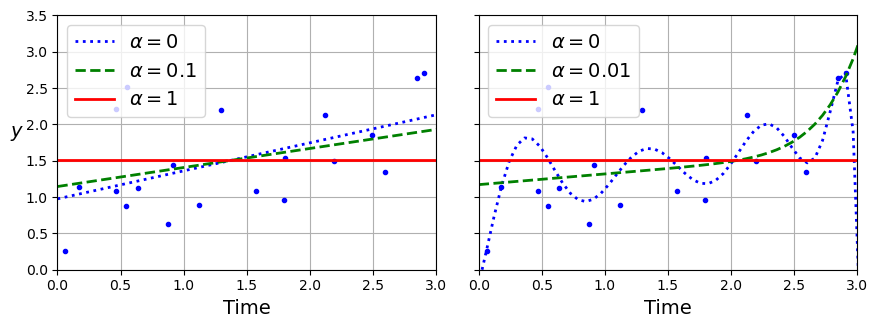

In [72]:
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
save_fig("mobile_app_data_example_3_comparision_lasso")
plt.show()

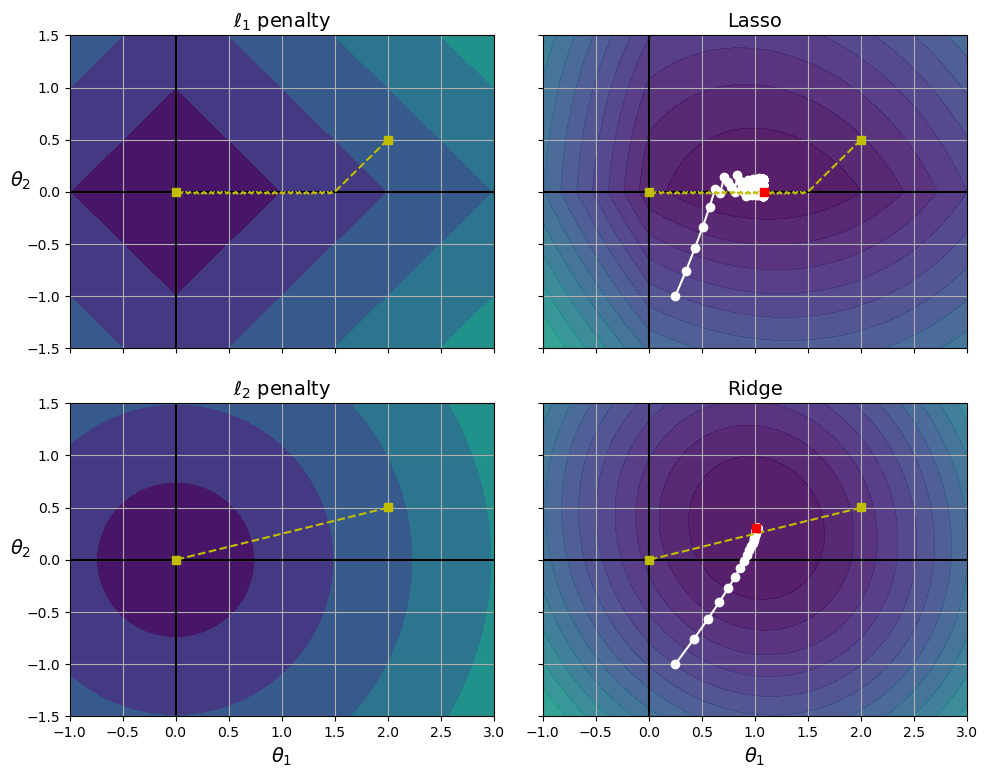

In [73]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1 / len(Xr) * ((T @ Xr.T - yr.T) ** 2).sum(axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(J.argmin(), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

def bgd_path(theta, X, y, l1, l2, core=1, eta=0.05, n_iterations=200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = (core * 2 / len(X) * X.T @ (X @ theta - y)
                     + l1 * np.sign(theta) + l2 * theta)
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))

for i, N, l1, l2, title in ((0, N1, 2.0, 0, "Lasso"), (1, N2, 0, 2.0, "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2 ** 2

    tr_min_idx = np.unravel_index(JR.argmin(), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levels = np.exp(np.linspace(0, 1, 20)) - 1
    levelsJ = levels * (J.max() - J.min()) + J.min()
    levelsJR = levels * (JR.max() - JR.min()) + JR.min()
    levelsN = np.linspace(0, N.max(), 10)

    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(theta=np.array([[2.0], [0.5]]), X=Xr, y=yr,
                      l1=np.sign(l1) / 3, l2=np.sign(l2), core=0)
    ax = axes[i, 0]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, N / 2.0, levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(fr"$\ell_{i + 1}$ penalty")
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")
    ax.set_ylabel(r"$\theta_2$", rotation=0)

    ax = axes[i, 1]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")

save_fig("mobile_app_data_example_3_lasso_vs_ridge_plot")
plt.show()

## Elastic Net

In [73]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(data3.Time.array.reshape(-1, 1), data3.Revenue)


ElasticNet(alpha=0.1)

In [81]:
X, y

(<PandasArray>
 [
 [0.749080237694725],
 [1.9014286128198323],
 [1.4639878836228102],
 [1.1973169683940732],
 [0.312037280884873],
 [0.3119890406724053],
 [0.1161672243363989],
 [1.7323522915498704],
 [1.2022300234864176],
 [1.416145155592091],
 [0.0411689885916048],
 [1.9398197043239889],
 [1.6648852816008437],
 [0.4246782213565523],
 [0.3636499344142012],
 [0.3668090197068676],
 [0.6084844859190754],
 [1.0495128632644757],
 [0.8638900372842315],
 [0.5824582803960838],
 [1.223705789444759],
 [0.2789877213040836],
 [0.5842892970704363],
 [0.7327236865873834],
 [0.912139968434072],
 [1.5703519227860272],
 [0.3993475643167194],
 [1.0284688768272232],
 [1.184829137724085],
 [0.0929008254399954],
 [1.2150897038028767],
 [0.341048247374583],
 [0.130103185970559],
 [1.8977710745066665],
 [1.9312640661491187],
 [1.6167946962329225],
 [0.6092275383467414],
 [0.1953442280127677],
 [1.3684660530243138],
 [0.8803049874792026],
 [0.2440764696895576],
 [0.9903538202225404],
 [0.0687770422304367],
 

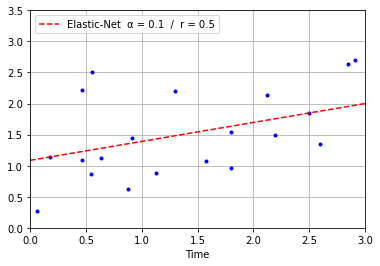

In [82]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(data3.Time.array.reshape(-1, 1), data3.Revenue)

X_elastic_net = np.linspace(0, 3, 3).reshape(-1, 1)
y_elastic_net = elastic_net.predict(X_elastic_net)
plt.plot(data3.Time, data3.Revenue, "b.")
plt.plot(X_elastic_net, y_elastic_net, "r--", label="Elastic-Net  \u03B1 = 0.1  /  r = 0.5")
plt.legend(loc="upper left")
plt.xlabel("Time")
plt.axis([0, 3, 0, 3.5])
plt.grid()

## Early Stopping

Let's go back to the quadratic dataset we used earlier:

In [83]:
df = pd.read_csv("https://raw.githubusercontent.com/VAWi-DataScience/Data-Science-and-Machine-Learning/main/Lecture/Data/03_Regression_data2.csv",sep=',')
df.head()

X = df.Time.array.reshape(-1, 1)
y = df.Revenue

# Import train_test_split function from 
from sklearn.model_selection import train_test_split
 
# Split X and y into training and testing sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.5,random_state=42)

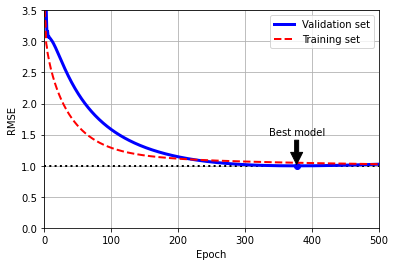

In [84]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []  # extra code – it's for the figure

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

    # extra code – we evaluate the train error and save it for the figure
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = mean_squared_error(y_train, y_train_predict, squared=False)
    val_errors.append(val_error)
    train_errors.append(train_error)

# generates and saves Figure
best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()

# Regression trees

In [85]:
# Import pandas
import pandas as pd
 
# Read data set
df = pd.read_csv("https://raw.githubusercontent.com/VAWi-DataScience/Data-Science-and-Machine-Learning/main/Lecture/Data/03_Regression_data2.csv",sep=',')
df.head()

,Time,Revenue
0,2.247241,1.617611
1,5.704286,8.061859
2,4.391964,4.452506
3,3.591951,0.779585
4,0.936112,1.846257


In [86]:
from sklearn.tree import DecisionTreeRegressor

X = df.Time.array.reshape(-1, 1)
y = df.Revenue

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

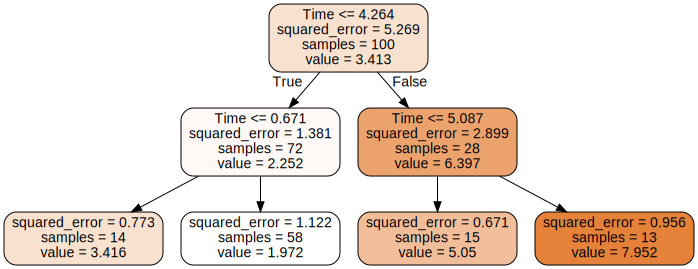

In [87]:
from sklearn.tree import export_graphviz
from graphviz import Source
# extra code – we've already seen how to use export_graphviz()
export_graphviz(
    tree_reg,
    out_file=str(IMAGES_PATH / "regression_tree.dot"),
    feature_names=["Time"],
    rounded=True,
    filled=True
)
Source.from_file(IMAGES_PATH / "regression_tree.dot")

In [88]:
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=42)

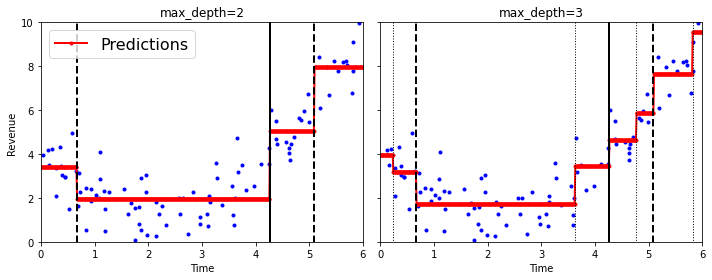

In [89]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 6, 0, 10]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("Time")
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"Predictions")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg, X, y)

th0, th1a, th1b = tree_reg.tree_.threshold[[0, 1, 4]]
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 10], style, linewidth=2)
plt.ylabel("Revenue")
plt.legend(loc="upper left", fontsize=16)
plt.title("max_depth=2")

plt.sca(axes[1])
th2s = tree_reg2.tree_.threshold[[2, 5, 9, 12]]
plot_regression_predictions(tree_reg2, X, y)
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 10], style, linewidth=2)
for split in th2s:
    plt.plot([split, split], [-0.05, 10], "k:", linewidth=1)
plt.title("max_depth=3")

save_fig("tree_regression_plot")
plt.show()

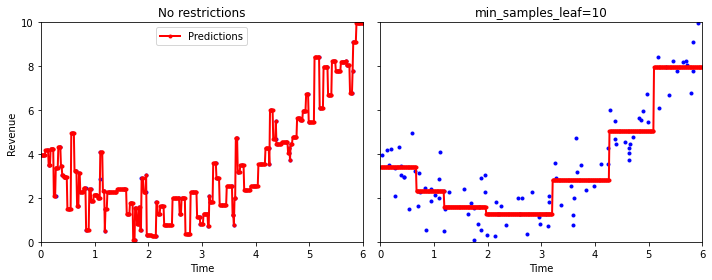

In [90]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 6, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"Predictions")
plt.axis([0, 6, 0, 10])
plt.xlabel("Time")
plt.ylabel("Revenue")
plt.legend(loc="upper center")
plt.title("No restrictions")

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"Predictions")
plt.axis([0, 6, 0, 10])
plt.xlabel("Time")
plt.title(f"min_samples_leaf={tree_reg2.min_samples_leaf}")

save_fig("tree_regression_regularization_plot")
plt.show()

## Example

### Select and prepare data

In [91]:
# Import pandas
import pandas as pd
 
# Read data set
df = pd.read_csv("https://raw.githubusercontent.com/VAWi-DataScience/Data-Science-and-Machine-Learning/main/Lecture/Data/03_Regression_data2.csv",sep=',')
df.head()

,Time,Revenue
0,2.247241,1.617611
1,5.704286,8.061859
2,4.391964,4.452506
3,3.591951,0.779585
4,0.936112,1.846257


### Split dataset

In [92]:
# Import train_test_split function from 
from sklearn.model_selection import train_test_split
 
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.Time.array.reshape(-1, 1), df.Revenue,test_size=0.2,random_state=42)

### Train ML model

In [93]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(min_samples_leaf=5, max_depth=4, random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=42)

### Evaluate training data

In [94]:
predictions_train_tree_reg = tree_reg.predict(X_train)
# Import the required libraries
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
 
# Evaluate mean absolute error
print('Mean Absolute Error(MAE):', mean_absolute_error(y_train,predictions_train_tree_reg))  
 
# Evaluate mean squared error
print("Mean Squared Error(MSE):", mean_squared_error(y_train, predictions_train_tree_reg))  
 
# Evaluate root mean squared error
print("Root Mean Squared Error(RMSE):", np.sqrt(mean_squared_error(y_train, predictions_train_tree_reg)))
 
# Evaluate R2-square
print("R2-Square:",r2_score(y_train, predictions_train_tree_reg))

Mean Absolute Error(MAE): 0.6432604099211322
Mean Squared Error(MSE): 0.6972290152885586
Root Mean Squared Error(RMSE): 0.8350024043609447
R2-Square: 0.8713875436174398


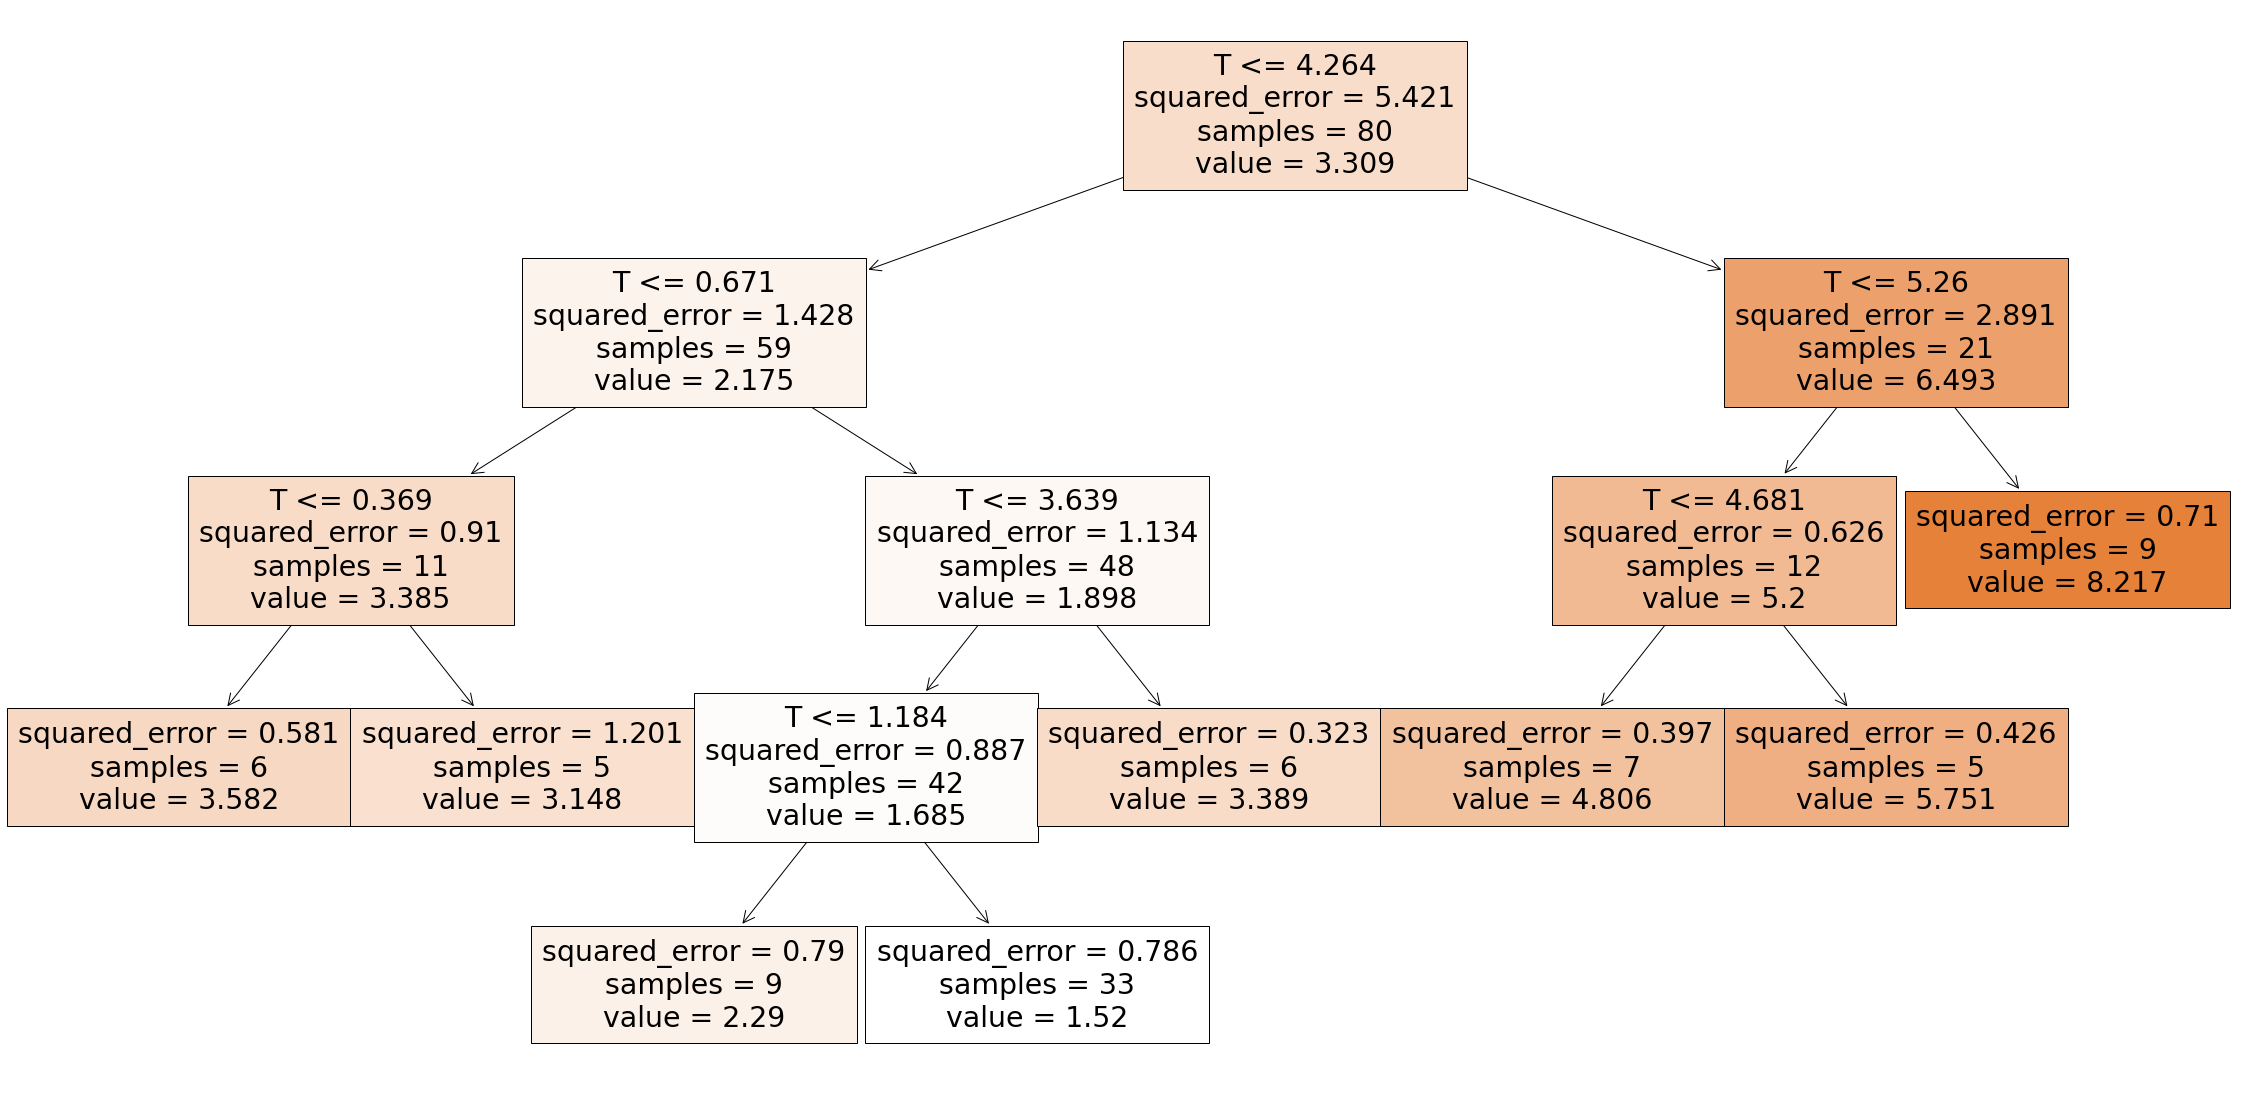

In [95]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = tree.plot_tree(tree_reg,feature_names = "Time", filled=True)
plt.show()

### Evaluate test data

In [96]:
# Predict the values given test set
predictions_test_tree_reg = tree_reg.predict(X_test)
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
 
# Evaluate mean absolute error
print('Mean Absolute Error(MAE):', mean_absolute_error(y_test,predictions_test_tree_reg))  
 
# Evaluate mean squared error
print("Mean Squared Error(MSE):", mean_squared_error(y_test, predictions_test_tree_reg))  
 
# Evaluate root mean squared error
print("Root Mean Squared Error(RMSE):", np.sqrt(mean_squared_error(y_test, predictions_test_tree_reg)))
 
# Evaluate R2-square
print("R2-Square:",r2_score(y_test, predictions_test_tree_reg))

Mean Absolute Error(MAE): 0.641961457977337
Mean Squared Error(MSE): 0.8065757192851801
Root Mean Squared Error(RMSE): 0.8980956069846796
R2-Square: 0.8185033510407402
